In [80]:
import numpy as np
import pandas as pd
import os

from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williamdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/williamdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamdas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
train = pd.read_table('train.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

valid = pd.read_table('valid.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

test = pd.read_table('test.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

combined = pd.concat([train, valid, test]).reset_index()

In [82]:
combined

,index,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference
12787,1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week"""
12788,1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal
12789,1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference


In [101]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#print(stop_words)

# Tokenization, Lemmatization, and Stop Word Removal
def preprocess_statement(statement):
    tokenized_statement = nltk.word_tokenize(statement)
    for idx, token in enumerate(tokenized_statement):
        if token.lower() in stop_words:
            tokenized_statement[idx] = 'X'
            continue
            
        tokenized_statement[idx] = lemmatizer.lemmatize(token)
    #print("Old Statement:", statement)
    #print("New Statement:", tokenized_statement)
        
    return tokenized_statement

#combined['statement'].apply(preprocess_statement)

In [103]:
combined['statement'] = combined['statement'].apply(preprocess_statement)
combined

,index,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,0,2635.json,false,"[Says, X, Annies, List, political, group, supp...",abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,1,10540.json,half-true,"[X, X, X, decline, X, coal, start, ?, X, start...","energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,2,324.json,mostly-true,"[Hillary, Clinton, agrees, X, John, McCain, ``...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,3,1123.json,false,"[Health, care, reform, legislation, X, likely,...",health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,4,9028.json,half-true,"[X, economic, turnaround, started, X, X, end, ...","economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,1262,7334.json,half-true,"[Says, X, budget, provides, X, highest, state,...",education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference
12787,1263,9788.json,barely-true,"[Ive, X, X, almost, every, day, .]","civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week"""
12788,1264,10710.json,barely-true,"[X, X, early, 1980s, ,, Sen., Edward, Kennedy,...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal
12789,1265,3186.json,barely-true,"[Says, X, EPA, permit, languished, X, Strickla...","environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference


In [96]:
import matplotlib.pyplot as plt

def word_cloud_pic(statement):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(statement)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    
def word_cloud_before_after(statement):
    word_cloud_pic(statement)
    ps = preprocess_statement(statement)
    ps = [t for t in ps if t != 'X']
    word_cloud_pic("".join(ps))

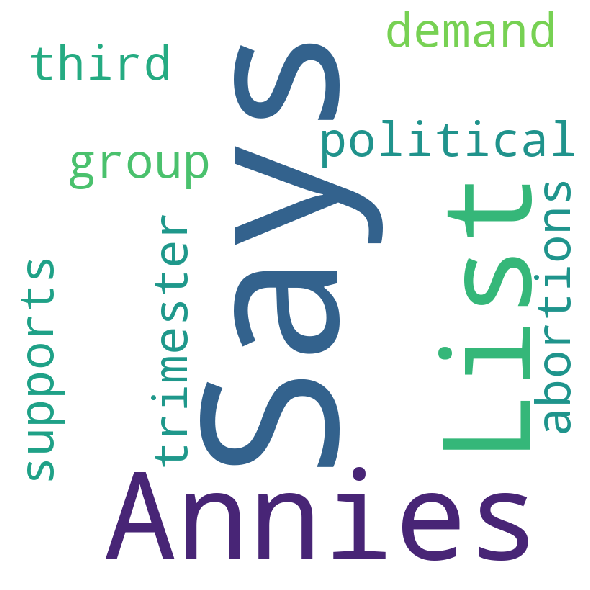

Old Statement: Says the Annies List political group supports third-trimester abortions on demand.
New Statement: ['Says', 'X', 'Annies', 'List', 'political', 'group', 'support', 'third-trimester', 'abortion', 'X', 'demand', '.']


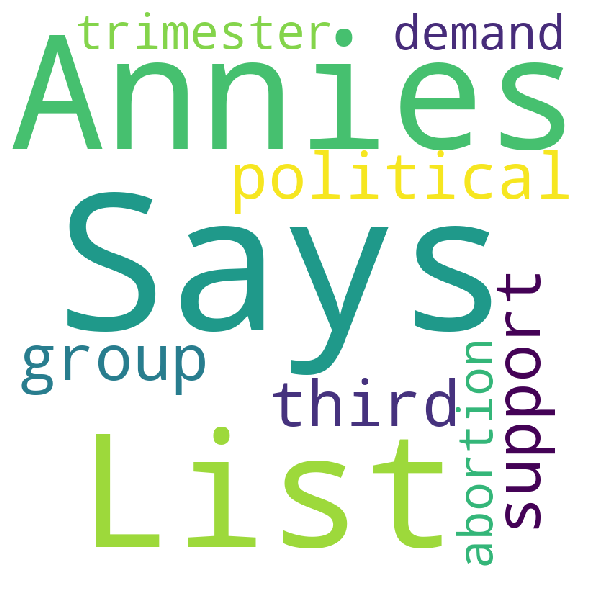

In [97]:
word_cloud_before_after(combined.loc[0, 'statement'])

In [100]:
ps = preprocess_statement(combined.loc[0, 'statement'])
ps = [t for t in ps if t != 'X']
" ".join(ps)

Old Statement: Says the Annies List political group supports third-trimester abortions on demand.
New Statement: ['Says', 'X', 'Annies', 'List', 'political', 'group', 'support', 'third-trimester', 'abortion', 'X', 'demand', '.']


'Says Annies List political group support third-trimester abortion demand .'

In [34]:
combined['statement']

0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       Hillary Clinton agrees with John McCain "by vo...
3       Health care reform legislation is likely to ma...
4       The economic turnaround started at the end of ...
                              ...                        
1262    Says his budget provides the highest state fun...
1263                      Ive been here almost every day.
1264    In the early 1980s, Sen. Edward Kennedy secret...
1265    Says an EPA permit languished under Strickland...
1266    Says the governor is going around the state ta...
Name: statement, Length: 12791, dtype: object

In [11]:
combined['label'].value_counts()

half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64

In [18]:
combined['subject'].value_counts()

health-care                           474
taxes                                 356
education                             309
elections                             304
immigration                           303
                                     ... 
federal-budget,income,taxes,wealth      1
children,debt,economy,education         1
labor,state-budget,urban                1
abortion,crime,voting-record,women      1
diversity,economy,history,jobs          1
Name: subject, Length: 4534, dtype: int64

In [13]:
combined['speaker'].value_counts()

barack-obama          611
donald-trump          343
hillary-clinton       297
mitt-romney           212
john-mccain           189
                     ... 
john-scocos             1
steve-phelps            1
matthew-hill            1
our-principles-pac      1
curt-schilling          1
Name: speaker, Length: 3309, dtype: int64

In [39]:
combined.groupby('subject').agg(['mean', 'median'])

barely_true_c         \
                                                        mean median   
subject                                                               
Alcohol                                             1.000000    0.0   
Alcohol,animals,children,crime                      0.000000    0.0   
Alcohol,campaign-finance,ethics,public-service      0.000000    0.0   
Alcohol,candidates-biography                        9.000000    9.0   
Alcohol,candidates-biography,crime                  6.000000    6.0   
...                                                      ...    ...   
welfare                                            10.214286    5.0   
welfare,workers                                     3.000000    3.0   
women                                               6.833333    1.0   
women,workers                                       4.500000    4.5   
workers                                             9.928571    0.5   

                                                  false_c        half_true_c  \
                                                     mean median        mean   
subject                                                                        
Alcohol                                          1.200000    0.0    2.400000   
Alcohol,animals,children,crime                   0.000000    0.0    0.000000   
Alcohol,campaign-finance,ethics,public-service   0.000000    0.0    0.000000   
Alcohol,candidates-biography                    19.000000   19.0    9.000000   
Alcohol,candidates-biography,crime               9.000000    9.0    3.000000   
...                                                   ...    ...         ...   
welfare                                         16.285714    3.5   10.142857   
welfare,workers                                  1.000000    1.0    4.000000   
women                                           10.083333    0.0    6.416667   
women,workers                                    1.500000    1.5    9.000000   
workers                                         15.214286    1.5   12.000000   

                                                      mostly_true_c         \
                                               median          mean median   
subject                                                                      
Alcohol                                           0.0      1.800000    0.0   
Alcohol,animals,children,crime                    0.0      0.000000    0.0   
Alcohol,campaign-finance,ethics,public-service    0.0      1.000000    1.0   
Alcohol,candidates-biography                      9.0      6.000000    6.0   
Alcohol,candidates-biography,crime                3.0      1.000000    1.0   
...                                               ...           ...    ...   
welfare                                           7.5      9.071429    5.5   
welfare,workers                                   4.0      1.000000    1.0   
women                                             1.5      4.750000    0.0   
women,workers                                     9.0      8.500000    8.5   
workers                                           2.0     12.357143    2.0   

                                               pants_on_fire_c         
                                                          mean median  
subject                                                                
Alcohol                                               0.600000    0.0  
Alcohol,animals,children,crime                        0.000000    0.0  
Alcohol,campaign-finance,ethics,public-service        0.000000    0.0  
Alcohol,candidates-biography                          6.000000    6.0  
Alcohol,candidates-biography,crime                    4.000000    4.0  
...                                                        ...    ...  
welfare                                              13.500000    2.5  
welfare,workers                                       2.000000    2.0  
women                                         

In [ ]:
def extract_features_statement(statement):
    pass